In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

<h2><b>Задача 1.</b></h2>

Вы работаете аналитиком в продуктовом магазине. Даны продажи молока по дням недели. Вы обнаружили, что есть есть несколько выбросов в данных - суперзавышенные значения в воскресные дни. Необходимо составить программу, которая вместо этих выбросов вставляла бы медианное значение всех воскресных продаж.

<b>При расчёте учитывать:</b>
<ul>
<li>дни недели в таблице даны как: понедельник, вторник, среда, четверг, пятница, суббота, воскресенье</li>
<li>уровень выброса рассчитывать с помощью техники тройного интерквартильного размаха.</li>
</ul>

Вывести первые 25 значений скорректированной таблицы.

Данные находятся в файле data.csv. Разделитель значений - точка с запятой. Разделителем дробных чисел применяется запятая. В таблице даны два столбца. Названия столбцов - показаны ниже.

в первом столбце - день, во втором столбце - молоко.

In [256]:
df = pd.read_csv('/Users/solbikn/Desktop/6_1.csv', sep=';', decimal=',', encoding='cp1251')
df.head()

,день,молоко
0,понедельник,105
1,вторник,139
2,среда,134
3,четверг,130
4,пятница,139


In [257]:
dd = df[df['день'] == 'воскресенье']

Q1 = dd['молоко'].quantile(0.25)
Q3 = dd['молоко'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

median_level = np.median(dd['молоко'])

for i in range(len(df)):
    if df.loc[i, 'день'] == 'воскресенье' and (df.loc[i, 'молоко'] < lower_bound or df.loc[i, 'молоко'] > upper_bound):
        df.loc[i, 'молоко'] = median_level

df.head(25)

/var/folders/kr/wmckybgx6rbbl1z4sc0zxmr40000gn/T/ipykernel_26949/2224211955.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '129.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i, 'молоко'] = median_level


,день,молоко
0,понедельник,105.0
1,вторник,139.0
2,среда,134.0
3,четверг,130.0
4,пятница,139.0
5,суббота,131.0
6,воскресенье,129.5
7,понедельник,136.0
8,вторник,125.0
9,среда,130.0


<h2><b>Задача 2.</b></h2>

На этот раз вы работаете в компании, которая обслуживает сервис по продаже автомобилей с пробегом. Поступила задача на разработку приложения для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. На первом шаге построения прогнозной модели нужно проанализировать данные на пропуски и заполнить их. Этим вам и предстоит заняться.

<b>Необходимо сделать:</b>

1. В данных VehicleType были обнаружены пропуски. Причём по группе бренд-марка встречается несколько строк. Вам нужно заполнить их по такому правилу: вставить наиболее часто встречаемый тип кузова у сочетания бренд-марка.

<b>Пример:</b> 

Если по сочетанию “volkswagen-golf” наиболее встречаемый тип кузова “small”. Поэтому Nan надо заполнить именно этим кузовом. Если по группе бренд-марка нет данных по кузову, то такие строки заполнить группой “unknown”.

2. Сформировать сводную таблицу из таких столбцов <b>[Brand, VehicleType, Price]</b>.
Цену вставить медианную по группам <b>[Brand, VehicleType]</b>.
Таблицу отсортировать по цене в порядке убывания и вывести первые первые 10 строк. Нумерацию индексов сделать заново. Названия столбцов использовать как в задании.
Данные находятся в файле data.csv.
Разделитель значений - точка с запятой. Разделителем дробных чисел применяется запятая. В таблице даны семь столбцов.

In [258]:
df = pd.read_csv('/Users/solbikn/Desktop/6_2.csv', sep=';', decimal=',', encoding='cp1251')
df.head()

,id,Price,RegistrationYear,Power,Brand,Model,VehicleType
0,1,480,1993,0,volkswagen,golf,NaN
1,2,9800,2004,163,jeep,grand,suv
2,3,1500,2001,75,volkswagen,golf,small
3,4,3600,2008,69,skoda,fabia,small
4,5,650,1995,102,bmw,3er,NaN


In [259]:
df['VehicleType'] = df.groupby(['Brand', 'Model'])['VehicleType'].transform(
    lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x.fillna('unknown')
)

df

,id,Price,RegistrationYear,Power,Brand,Model,VehicleType
0,1,480,1993,0,volkswagen,golf,sedan
1,2,9800,2004,163,jeep,grand,suv
2,3,1500,2001,75,volkswagen,golf,small
3,4,3600,2008,69,skoda,fabia,small
4,5,650,1995,102,bmw,3er,sedan
...,...,...,...,...,...,...,...
1413,1414,3250,2003,102,audi,a3,sedan
1414,1415,5299,2004,150,bmw,3er,coupe
1415,1416,3500,2001,68,volkswagen,transporter,bus
1416,1417,2800,2004,128,fiat,other,bus


In [260]:
grouped = df.groupby(['Brand', 'VehicleType'])['Price'].median()

result_df = grouped.reset_index() \
             .sort_values('Price', ascending=False) \
             .reset_index(drop=True)

print(result_df.head(10))

           Brand  VehicleType    Price
0     volkswagen          suv  15600.0
1            bmw          suv  14800.0
2      chevrolet        wagon  13499.0
3          skoda          suv  13200.0
4  mercedes_benz  convertible  12790.0
5          volvo  convertible  12400.0
6     volkswagen        coupe  11500.0
7        porsche  convertible  10450.0
8         nissan        coupe  10200.0
9        peugeot          bus  10000.0


<h2><b>Задача 3.</b></h2>

В отделе качества промышленного завода производят анализ факторов, влияющих на качество производства. На первом шаге необходимо заполнить пропуски в имеющейся таблице данных.

Данные находятся в файле data.csv.
Разделитель значений - точка с запятой. Разделителем дробных чисел применяется запятая. В таблице даны три столбца. Названия столбцов - показаны ниже
<ul>
<li>key - номер группы (по одной группе есть несколько измерений изделия)</li>
<li>вес - вес изделия</li>
<li>затрачиваемая мощность - потраченная при производстве электрическая мощность</li>
</ul>

Пропуски заполнять следующим образом:

1) пропуск в факторе “вес” заполнить предыдущим значением

2) в факторе “затрачиваемая мощность” могут встречаться одиночные пропуски и несколько пропусков подряд. Одиночные пропуски и первый из пропусков из нескольких подряд заполнить методом интерполяции. А оставшиеся пропуски в этом факторе заполнить групповой медианой по группам, которая указана в столбце “key”.

3) создать новую таблицу, произведя суммирование каждого фактора по группе ”key”

Вывести первые 30 строк новой таблицы, состоящей из двух факторов <b>['вес', 'затрачиваемая_мощность']</b>. Итоговые значения округлить до целого. Названия столбцов привести к формату PEP8 (кириллицу оставляем).

In [261]:
df = pd.read_csv('/Users/solbikn/Desktop/6_3.csv', sep=';', decimal=',', encoding='cp1251')
df.columns = df.columns.str.lower().str.replace(' ', '_')
df

,key,вес,затрачиваемая_мощность
0,1,1571.0,4.18
1,1,1604.0,NaN
2,1,1618.0,NaN
3,1,NaN,8.07
4,1,1606.0,7.41
...,...,...,...
14660,3237,1569.0,7.17
14661,3238,1584.0,8.58
14662,3239,1598.0,7.23
14663,3240,1617.0,6.64


In [262]:
df['вес'] = df['вес'].fillna('жопа')

for i in range(len(df)):
    if df.loc[i, 'вес'] == 'жопа':
        df.loc[i, 'вес'] = df.loc[i - 1, 'вес']

df

,key,вес,затрачиваемая_мощность
0,1,1571.0,4.18
1,1,1604.0,NaN
2,1,1618.0,NaN
3,1,1618.0,8.07
4,1,1606.0,7.41
...,...,...,...
14660,3237,1569.0,7.17
14661,3238,1584.0,8.58
14662,3239,1598.0,7.23
14663,3240,1617.0,6.64


In [263]:
interpol = df['затрачиваемая_мощность'].interpolate(method='linear')
medium = df['затрачиваемая_мощность'].median()

df['затрачиваемая_мощность'] = df['затрачиваемая_мощность'].fillna('жопа')

for i in range(1, len(df) - 1):
    if df.loc[i - 1, 'затрачиваемая_мощность'] != 'жопа' and df.loc[i, 'затрачиваемая_мощность'] == 'жопа':
        df.loc[i, 'затрачиваемая_мощность'] = interpol.iloc[i]
        i += 1

for i in range(len(df)):
    if df.loc[i, 'вес'] == 'жопа':
        df.loc[i, 'вес'] = medium

df['затрачиваемая_мощность'] = pd.to_numeric(df['затрачиваемая_мощность'], errors='coerce')
df['затрачиваемая_мощность'] = df['затрачиваемая_мощность'].fillna(medium)

df

,key,вес,затрачиваемая_мощность
0,1,1571.0,4.180000
1,1,1604.0,5.476667
2,1,1618.0,6.773333
3,1,1618.0,8.070000
4,1,1606.0,7.410000
...,...,...,...
14660,3237,1569.0,7.170000
14661,3238,1584.0,8.580000
14662,3239,1598.0,7.230000
14663,3240,1617.0,6.640000


In [264]:
result = df.groupby('key')[['вес', 'затрачиваемая_мощность']].sum().round().astype(float)
result['затрачиваемая_мощность'] = result['затрачиваемая_мощность'].round().astype(float)
result = result.reset_index(drop=True)

result.head(30)

,вес,затрачиваемая_мощность
0,9630.0,39.0
1,7938.0,36.0
2,9589.0,41.0
3,8089.0,36.0
4,7945.0,33.0
5,7920.0,36.0
6,7944.0,35.0
7,7983.0,38.0
8,9540.0,45.0
9,11090.0,61.0


<h2><b>Задача 4.</b></h2>

Вы работаете аналитиком в интернет-магазине. Компания ведёт активную продажу товаров для населения. Часть покупателей снизила свою покупательскую активность. Необходимо исследовать данные, чтобы выявить причину этого.

Для этого провести следующие работы:

1. В факторе “выручка” есть пропуски и есть выбросы в бОльшую сторону.
<ul>
<li>сначала пропуски заполнить групповой медианой</li>
<li>потом выбросы заменить также групповой медианой.</li>
</ul>

2. Необходимо написать программу, которая бы выводила р-уровень при сравнении всех количественных факторов продаж по двум группам между собой.
<ul>
<li>группа покупателей 1: покупатели типа товара “товары для себя” и снизили покупательскую активность</li>
<li>группа покупателей 2: покупатели типа товара “товары для себя”, а покупательская активность осталась на “Прежний уровень”</li>
</ul>

В расчётах учесть:

1. Группа это: двойная группировка по факторам “покупательская активность” и “тип товара”
2. Выбросы по выручке - только в большую сторону. Для очистки применить алгоритм тройного интерквартильного размаха
3. Если данные в обеих группах распределены нормально, то для сравнения использовать метод Стьюдент с различной дисперсией. Если хотя бы в одной группе - не нормальное распределение, то для сравнения использовать метод Манн-Уитни. Для проверки на нормальность использовать метод Шапиро c уровнем принятия решения 0.05
4. Данные загружаются из csv_файла, разделителем является ; а разделитель десятичных значений в данных - запятая
5. Результат вывести в виде списка списков. Первый список - названия выводимых результатов: ['показатель', 'р-уровень', 'метод расчёта']. Остальные списки - расчёты по каждому показателю(фактору)
6. Названия факторов в таблице привести к стандарту PEP8. Кириллицу оставляем

<b>Описание исходных данных</b>
 
Данные находятся в файле data.csv.
Разделитель значений - точка с запятой. Разделителем дробных чисел применяется запятая. В таблице даны три столбца. Названия столбцов - показаны ниже.

Описание:
<ul>
<li>в первом столбце Покупательская активность - активность покупателя. Два уровня: “Снизилась” и “Прежний уровень”</li>
<li>в втором столбце тип товара - два типа товара: “товары для себя” и “товары для дома”</li>
<li>в третьем столбце История продаж - показывает, сколько дней уже покупатель зарегистрирован на сайте, в днях</li>
<li>в четвёртом столбце Неоплаченные_товары - сколько товаров покупатель положил в корзину, но не оплатил, в штуках</li>
<li>в пятом столбце Выручка -выручка покупателя в рублях за месяц</li>
</ul>

In [265]:
df = pd.read_csv('/Users/solbikn/Desktop/6_4.csv', sep=';', decimal=',', encoding='cp1251')
df.columns = df.columns.str.lower().str.replace(' ', '_')
df

,покупательская_активность,тип_товара,история_продаж,неоплаченные_товары,выручка
0,Снизилась,товары для себя,575,2,4635.0
1,Снизилась,товары для себя,786,2,5213.0
2,Снизилась,товары для дома,935,5,4992.0
3,Снизилась,товары для себя,515,2,5268.0
4,Снизилась,товары для дома,1013,4,4932.0
...,...,...,...,...,...
1295,Прежний уровень,товары для себя,218,4,4704.0
1296,Прежний уровень,товары для дома,753,3,5299.0
1297,Прежний уровень,товары для себя,762,1,5334.0
1298,Прежний уровень,товары для себя,452,2,4725.0


In [266]:
group_means = df.groupby(['покупательская_активность', 'тип_товара'])['выручка'].transform('median')

df['выручка'] = df['выручка'].fillna(group_means)
df

,покупательская_активность,тип_товара,история_продаж,неоплаченные_товары,выручка
0,Снизилась,товары для себя,575,2,4635.0
1,Снизилась,товары для себя,786,2,5213.0
2,Снизилась,товары для дома,935,5,4992.0
3,Снизилась,товары для себя,515,2,5268.0
4,Снизилась,товары для дома,1013,4,4932.0
...,...,...,...,...,...
1295,Прежний уровень,товары для себя,218,4,4704.0
1296,Прежний уровень,товары для дома,753,3,5299.0
1297,Прежний уровень,товары для себя,762,1,5334.0
1298,Прежний уровень,товары для себя,452,2,4725.0


In [267]:
Q1 = df['выручка'].quantile(0.25)
Q3 = df['выручка'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

for i in range(len(df)):
    if df.loc[i, 'выручка'] > upper_bound:
        df.loc[i, 'выручка'] = group_means.iloc[i]

df

,покупательская_активность,тип_товара,история_продаж,неоплаченные_товары,выручка
0,Снизилась,товары для себя,575,2,4635.0
1,Снизилась,товары для себя,786,2,5213.0
2,Снизилась,товары для дома,935,5,4992.0
3,Снизилась,товары для себя,515,2,5268.0
4,Снизилась,товары для дома,1013,4,4932.0
...,...,...,...,...,...
1295,Прежний уровень,товары для себя,218,4,4704.0
1296,Прежний уровень,товары для дома,753,3,5299.0
1297,Прежний уровень,товары для себя,762,1,5334.0
1298,Прежний уровень,товары для себя,452,2,4725.0


In [268]:
group_customers_1 = df[
    (df['тип_товара'] == 'товары для себя') & 
    (df['покупательская_активность'] == 'Снизилась')
]

group_customers_1

,покупательская_активность,тип_товара,история_продаж,неоплаченные_товары,выручка
0,Снизилась,товары для себя,575,2,4635.0
1,Снизилась,товары для себя,786,2,5213.0
3,Снизилась,товары для себя,515,2,5268.0
5,Снизилась,товары для себя,900,3,4582.0
6,Снизилась,товары для себя,610,5,5351.0
...,...,...,...,...,...
395,Снизилась,товары для себя,375,6,5213.0
396,Снизилась,товары для себя,439,5,4992.0
397,Снизилась,товары для себя,550,1,5268.0
398,Снизилась,товары для себя,987,1,4932.0


In [269]:
group_customers_2 = df[
    (df['тип_товара'] == 'товары для себя') & 
    (df['покупательская_активность'] == 'Прежний уровень')
]

group_customers_2

,покупательская_активность,тип_товара,история_продаж,неоплаченные_товары,выручка
401,Прежний уровень,товары для себя,624,3,5621.0
402,Прежний уровень,товары для себя,634,5,4642.0
403,Прежний уровень,товары для себя,957,2,4579.0
405,Прежний уровень,товары для себя,191,0,5120.0
406,Прежний уровень,товары для себя,937,2,4752.0
...,...,...,...,...,...
1294,Прежний уровень,товары для себя,597,2,5011.0
1295,Прежний уровень,товары для себя,218,4,4704.0
1297,Прежний уровень,товары для себя,762,1,5334.0
1298,Прежний уровень,товары для себя,452,2,4725.0


In [270]:
nominal_columns = ['история_продаж', 'неоплаченные_товары', 'выручка']
m_test = [['показатель', 'р-уровень', 'метод расчёта р-уровня']]

for column in nominal_columns:
    data1 = group_customers_1[column].values
    data2 = group_customers_2[column].values
    
    shapiro1 = st.shapiro(data1)[1] > 0.05
    shapiro2 = st.shapiro(data2)[1] > 0.05
    
    if shapiro1 and shapiro2:
        _, p_value = st.ttest_ind(data1, data2, equal_var=False)
        method = 'Стьюдент'
    else:
        _, p_value = st.mannwhitneyu(data1, data2, alternative='two-sided')
        method = 'Манн-Уитни'
    
    m_test.append([
        column,
        round(float(p_value), 4), 
        method
    ])

m_test

[['показатель', 'р-уровень', 'метод расчёта р-уровня'],
 ['история_продаж', 0.0111, 'Манн-Уитни'],
 ['неоплаченные_товары', 0.0, 'Манн-Уитни'],
 ['выручка', 0.0056, 'Манн-Уитни']]

<h2><b>Задача 5.</b></h2>

Возвращаемся в проект по предсказанию цены на автомобиль. Данные находятся в файле data.csv. Разделитель значений - запятая. С качеством данных поработали в задаче 6.2. Теперь надо провести графический анализ.

<b>Необходимо сделать:</b>

1) Перевести название колонок в стандарт PEP8:
- перевести в нижний регистр
- пробелы между словами заменить на _

2) Создать новый фактор на основе года выпуска автомобиля:
- если год менее или равен 1980, то обозначить раритет
- если год более 1980, но менее или равен 2010, то обозначить старые
- если год более 2010, но менее или равен 2020, то обозначить массовые
- если год более 2020 то обозначить современные

3) отобрать данные по условиям:
- выбирать бренд автомобиля, который вводится с экрана
- по выбранному бренду отобрать только те, у которых мощность более 30, а цена более 0

4) По выбранной группе автомобилей построить изображение трёх графиков, которые должны быть расположены в одном ряду:
- первый график: круговая диаграмма по новому фактору, в котором мы закодировали возраст автомобиля (раритет, старый и т.д.)
- второй график: гистограмма цены автомобиля с параметром количества столбцов 20. Использовать сиборн. И вывести также график оценки плотности
- третий график: диаграмма рассеяния. Ось ОХ - это мощность. Ось OY - это цена
- размер изображения: 11х4 дюймов

5) Параметры и оформление картинки с изображением графиков:
- оси OY не подписывать
- ось OX на втором и третьем графике подписать "Цена" и "Мощность" соответственно. Шрифт выбрать 13
- сделать подпись всего изображения.

Название: Исследование данных по моделям автомобилей
Шрифт выбрать 16. Отступ заголовка до начала графиков выбрать 1.01

In [271]:
df = pd.read_csv('/Users/solbikn/Desktop/6_5.csv', sep=';', decimal=',', encoding='cp1251')
df.columns = df.columns.str.lower().str.replace(' ', '_')
df

,id,price,registrationyear,power,brand,model
0,1,480,1993,0,volkswagen,golf
1,2,9800,2004,163,jeep,grand
2,3,1500,2001,75,volkswagen,golf
3,4,3600,2008,69,skoda,fabia
4,5,650,1995,102,bmw,3er
...,...,...,...,...,...,...
1398,1414,3250,2003,102,audi,a3
1399,1415,5299,2004,150,bmw,3er
1400,1416,3500,2001,68,volkswagen,transporter
1401,1417,2800,2004,128,fiat,other


In [272]:
df['type'] = np.where(df['registrationyear'] > 2020, 'современный',
                np.where(df['registrationyear'] > 2010, 'массовый',
                np.where(df['registrationyear'] > 1980, 'старый', 'раритет')))
df

,id,price,registrationyear,power,brand,model,type
0,1,480,1993,0,volkswagen,golf,старый
1,2,9800,2004,163,jeep,grand,старый
2,3,1500,2001,75,volkswagen,golf,старый
3,4,3600,2008,69,skoda,fabia,старый
4,5,650,1995,102,bmw,3er,старый
...,...,...,...,...,...,...,...
1398,1414,3250,2003,102,audi,a3,старый
1399,1415,5299,2004,150,bmw,3er,старый
1400,1416,3500,2001,68,volkswagen,transporter,старый
1401,1417,2800,2004,128,fiat,other,старый


In [273]:
car_brand = input().lower()

dd = df[(df['brand'] == car_brand) & (df['power'] > 30) & (df['price'] > 0)]
dd

,id,price,registrationyear,power,brand,model,type
7,8,14500,2014,125,ford,c_max,массовый
17,18,7550,2007,136,ford,c_max,старый
70,71,750,2002,50,ford,fiesta,старый
78,80,600,1994,75,ford,escort,старый
83,85,6800,2009,82,ford,fiesta,старый
...,...,...,...,...,...,...,...
1348,1363,350,1997,116,ford,mondeo,старый
1352,1367,6750,2006,125,ford,galaxy,старый
1366,1381,1100,2000,50,ford,fiesta,старый
1392,1408,560,2002,50,ford,ka,старый


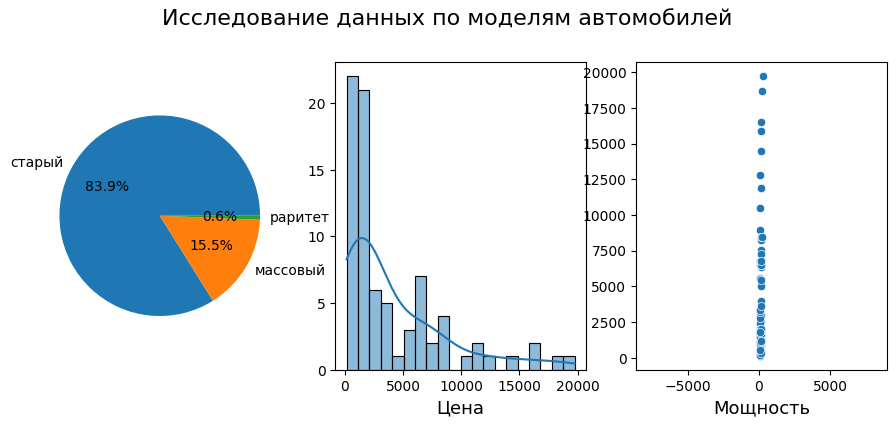

In [274]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(11, 4))
fig.suptitle('Исследование данных по моделям автомобилей', fontsize=16, y=1.01)

age_counts = df['type'].value_counts()
age_counts.plot.pie(autopct='%1.1f%%', ax=ax1, labels=age_counts.index)
ax1.set_ylabel('')
plt.axis('equal')

sns.histplot(data=dd, x='price', bins=20, kde=True, ax=ax2)
ax2.set_xlabel('Цена', fontsize=13)
ax2.set_ylabel('')

sns.scatterplot(data=dd, x='power', y='price', ax=ax3)
ax3.set_xlabel('Мощность', fontsize=13)
ax3.set_ylabel('')

plt.show()